# Modelamiento de datos

El modelamiento de datos es el proceso de crear un modelo de datos para almacenar datos en una base de datos. Este modelo de datos define cómo se van a almacenar los datos en la base de datos. El modelamiento de datos se puede realizar de dos formas: modelamiento relacional y modelamiento dimensional. En este laboratorio, vamos a realizar el **modelamiento dimensional de los datos.**

## 1. Preparación del entorno

In [2]:
# get the current working directory
!pwd

/home/jovyan


In [3]:
# Define if we are working remotely or not, remotely means the IDE is connected to the jupyter server  in the docker container
working_remotely = True
base_dir = 'work/' if working_remotely else ''

In [27]:
# download the dataset for the retail store, unzip the csv files, use the base_dir variable to save the file in the correct folder
!cd {base_dir}data/ && wget https://storage.googleapis.com/data-23/retail.zip && unzip retail.zip && rm retail.zip

--2023-11-17 17:01:51--  https://storage.googleapis.com/data-23/retail.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.39.123, 172.217.23.219, 216.58.208.123, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.39.123|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21999858 (21M) [application/x-zip-compressed]
Saving to: ‘retail.zip’

retail.zip          100%[===================>]  20.98M  11.1MB/s    in 1.9s    

2023-11-17 17:01:54 (11.1 MB/s) - ‘retail.zip’ saved [21999858/21999858]

Archive:  retail.zip
  inflating: address.csv             
  inflating: city.csv                
  inflating: customer.csv            
  inflating: merchant.csv            
  inflating: transaction.csv         


In [3]:
!python {base_dir}populate_tables.py -c {base_dir}db.ini -d {base_dir}data/address.csv -t address

2023-11-17 13:12:04,202 - root - INFO - Reading data from work/data/address.csv
2023-11-17 13:12:04,215 - root - INFO - Creating the database connection
2023-11-17 13:12:04,245 - root - INFO - Populating the address table


In [4]:
!python {base_dir}populate_tables.py -c {base_dir}db.ini -d {base_dir}data/city.csv -t city

2023-11-17 13:12:05,704 - root - INFO - Reading data from work/data/city.csv
2023-11-17 13:12:05,716 - root - INFO - Creating the database connection
2023-11-17 13:12:05,738 - root - INFO - Populating the city table


In [5]:
!python {base_dir}populate_tables.py -c {base_dir}db.ini -d {base_dir}data/customer.csv -t customer

2023-11-17 13:12:06,959 - root - INFO - Reading data from work/data/customer.csv
2023-11-17 13:12:06,970 - root - INFO - Creating the database connection
2023-11-17 13:12:06,992 - root - INFO - Populating the customer table


In [6]:
!python {base_dir}populate_tables.py -c {base_dir}db.ini -d {base_dir}data/merchant.csv -t merchant

2023-11-17 13:12:17,964 - root - INFO - Reading data from work/data/merchant.csv
2023-11-17 13:12:17,978 - root - INFO - Creating the database connection
2023-11-17 13:12:18,000 - root - INFO - Populating the merchant table


In [7]:
!python {base_dir}populate_tables.py -c {base_dir}db.ini -d {base_dir}data/transaction.csv -t transaction

2023-11-17 13:12:32,301 - root - INFO - Reading data from work/data/transaction.csv
2023-11-17 13:12:32,857 - root - INFO - Creating the database connection
2023-11-17 13:12:32,879 - root - INFO - Populating the transaction table


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

## 2.1 Conectando a PostgreSQL

In [4]:
import configparser
from sqlalchemy import create_engine, text

In [5]:
# reading the db config file
config = configparser.ConfigParser()
config.read(f'{base_dir}db.ini')

# profile name
profile = "postgres"

# getting the db config
POSTGRES_USERNAME = config[profile]['username']
POSTGRES_PASSWORD = config[profile]['password']
POSTGRES_HOST = config[profile]['host']
POSTGRES_PORT = config[profile]['port']
POSTGRES_DATABASE = config[profile]['database']

# creating the connection string
postgres_connection_string = f'postgresql://{POSTGRES_USERNAME}:{POSTGRES_PASSWORD}@{POSTGRES_HOST}:{POSTGRES_PORT}/{POSTGRES_DATABASE}'

engine =  create_engine(postgres_connection_string)
conn = engine.connect()

In [6]:
conn.execution_options(isolation_level="AUTOCOMMIT")

Ahora leeremos cada una de las tablas de la base de datos y las guardaremos en un DataFrame de pandas.

In [15]:
df_customer = pd.read_sql_table('customer', conn)
df_customer.head(10)

,cust_id,first_name,last_name,credit_card_number,gender,job,date_of_birth,addr_id
0,1,Mary,Diaz,60416207185,F,Information systems manager,1986-02-17,552616
1,679,Jeffrey,Powers,60422928733,M,Secondary school teacher,1942-04-02,224336
2,1348,Jason,Gray,60423098130,M,Barrister's clerk,1958-07-28,496885
3,1576,Bradley,Martinez,60427851591,M,Politician's assistant,1976-06-30,201281
4,1791,David,White,60487002085,M,"Horticulturist, commercial",1972-08-15,379665
5,2030,Karen,Johnson,60490596305,F,"Programmer, applications",1963-05-19,254192
6,2485,Randall,Dillon,60495593109,M,Television camera operator,1942-11-24,257975
7,2709,Robert,Flores,501802953619,M,Call centre manager,1958-09-20,189139
8,3344,Sandra,Davies,501828204849,F,"Buyer, industrial",1958-10-26,181573
9,3562,Corey,Jones,501831082224,M,Armed forces logistics/support/administrative ...,1962-05-04,406365


In [16]:
df_address = pd.read_sql_table('address', conn)
df_address.head(10)

,addr_id,street,zip,lat,long,city_id
0,1,0005 Morrison Land,74047,35.8896,-96.0887,333913
1,674,000 Jennifer Mills,98027,47.4974,-122.0107,239877
2,1723,00315 Ashley Valleys,67020,38.0261,-97.6666,72289
3,2226,0043 Henry Plaza,36009,31.5710,-86.2743,58889
4,2675,005 Cody Estates,40202,38.2507,-85.7476,287117
5,3325,0069 Robin Brooks Apt. 695,49628,44.5995,-86.2141,147996
6,4576,007 Tonya Isle Suite 299,52658,40.7067,-91.2268,542124
7,4582,00821 Joanna Meadow,53926,43.6718,-89.1918,121020
8,4795,0107 Clements Point,84003,40.3928,-111.7941,11703
9,5212,010 Salazar Walk,41810,37.1788,-82.6950,116019


In [17]:
df_city = pd.read_sql_table('city', conn)
df_city.head(10)

,city_id,city_name,state,city_population
0,1,Achille,OK,608
1,209,Acworth,NH,477
2,1037,Adams,WI,3508
3,1260,Afton,MI,937
4,2157,Akron,OH,272134
5,2379,Albany,NY,151022
6,2802,Albuquerque,NM,641349
7,3256,Alder,MT,286
8,3697,Aledo,TX,13602
9,4132,Alexandria,VA,321490


In [18]:
df_merchant = pd.read_sql_table('merchant', conn)
df_merchant.head(10)

,merchant_id,merchant_name,category,lat,long
0,1,fraud_Abbott-Rogahn,entertainment,36.549810,-98.190155
1,804,fraud_Abbott-Steuber,personal_care,34.535681,-86.228169
2,1570,fraud_Abernathy and Sons,food_dining,33.049522,-90.030952
3,2332,fraud_Abshire PLC,entertainment,41.627550,-85.165781
4,3170,fraud_Adams-Barrows,health_fitness,41.502652,-73.721972
5,3959,"fraud_Adams, Kovacek and Kuhlman",grocery_net,39.274435,-86.277941
6,4373,"fraud_Altenwerth, Cartwright and Koss",shopping_net,45.820055,-94.086909
7,5224,fraud_Altenwerth-Kilback,home,38.442441,-77.489253
8,6315,fraud_Ankunding-Carroll,travel,44.425235,-68.862994
9,6649,fraud_Ankunding LLC,shopping_net,38.954353,-100.615743


In [19]:
df_transaction = pd.read_sql_table('transaction', conn)
df_transaction.head(10)

,transaction_id,amount,transfer_timestamp,unix_time,is_fraud,cust_id,merchant_id
0,00005fc67bb45d98730559d40c9ca601,11,2020-10-11 14:40:55,1381502455,0,339854,449814
1,00006889944d759855fea412e09ecdd8,168,2020-10-08 17:15:17,1381252517,0,4910,509658
2,00008f7ba50172eef2b057a0e06aa142,33,2020-12-07 07:50:28,1386402628,0,26930,307925
3,0000948be671f10fc10b2aee0d67edee,65,2020-10-06 21:05:18,1381093518,0,164595,368814
4,0000ad2f657e05cba8e1f3654c3317a4,87,2020-06-30 07:16:26,1372576586,0,400234,352454
5,0000e82fd9660b8069fd16845d540615,7,2020-07-29 02:26:07,1375064767,0,502550,52205
6,00013a9a862695102316e8d566462618,78,2020-10-04 06:14:12,1380867252,0,550885,467602
7,00013fa083c116fed2268a7db6c6506b,5,2020-11-10 20:23:51,1384115031,0,138630,354188
8,00017954fb9236f8b82ea2237d521f92,7,2020-08-19 15:13:40,1376925220,0,286411,253276
9,00017fcc7a37796b5ebf048464185744,4,2020-07-28 07:17:28,1374995848,0,77403,339746


## 3 Modelando datos

### 3.1. Modelamiento dimensional - Star Schema

El modelo de datos es el siguiente:

![](image/olap.png)

En esta seccion vamos a realizar el modelamiento dimensional de los datos. Para eso, vamos a crear las tablas dimensionales que daran contexto e informacion a la tabla de facts. Estas tablas dimensionales son:

- `dim_time`
- `dim_merchant`
- `dim_customer`
- `dim_address`
Y finalmente, la tabla de facts es `fact_transaction`.


In [12]:
# Creamos la tabla dim_merchant de la tabla merchant, merchant id es la llave primaria
query = text("""
CREATE TABLE dim_merchant AS (
SELECT DISTINCT ON (merchant_id)
    merchant_name,
    category,
    lat,
    long
FROM merchant
)
""")

# Ejecutamos la query
conn.execute(query)

In [13]:
pd.read_sql_table('dim_merchant', conn).head(5)

,merchant_name,category,lat,long
0,fraud_Abbott-Rogahn,entertainment,36.549810,-98.190155
1,fraud_Abbott-Steuber,personal_care,34.535681,-86.228169
2,fraud_Abernathy and Sons,food_dining,33.049522,-90.030952
3,fraud_Abshire PLC,entertainment,41.627550,-85.165781
4,fraud_Adams-Barrows,health_fitness,41.502652,-73.721972


In [14]:
# Alteramos la tabla dim_merchant para agregar la llave primaria, y verificar que los tipos de datos sean correctos
query = text("""
ALTER TABLE dim_merchant
ADD COLUMN merchant_id SERIAL PRIMARY KEY,
ALTER COLUMN merchant_name TYPE VARCHAR(255),
ALTER COLUMN category TYPE VARCHAR(255),
ALTER COLUMN lat TYPE FLOAT,
ALTER COLUMN long TYPE FLOAT
""")
conn.execute(query)


In [16]:
pd.read_sql_table('dim_merchant', conn).head(5)

,merchant_name,category,lat,long,merchant_id
0,fraud_Abbott-Rogahn,entertainment,36.549810,-98.190155,1
1,fraud_Abbott-Steuber,personal_care,34.535681,-86.228169,2
2,fraud_Abernathy and Sons,food_dining,33.049522,-90.030952,3
3,fraud_Abshire PLC,entertainment,41.627550,-85.165781,4
4,fraud_Adams-Barrows,health_fitness,41.502652,-73.721972,5


Creamos las tablas dimensionales restantes y la tabla de fact.
**Atencion-1:** La tabla de facts debe tener las llaves foraneas a las tablas dimensionales.
**Atencion-2:** La tabla de facts debe tener la llave primaria `transaction_id`.
**Atencion-3:** La tabla de facts debe tener el campo `is_fraud` como booleano.
**Atencion-4:** Mostrar las primeras 5 filas de cada tabla. Usen el comando `pd.read_sql_table('table_name', conn).head(5)`


In [ ]:
"""Your answer here"""

### 3.2. Modelamiento Data Vault

El modelamiento Data Vault es el siguiente:

Tabla `hub_customer`:

| hashkey_customer | customer_id | load_timestamp |
|------------------|-------------|----------------|
|                  |             |                |

Tabla `hub_merchant`:

| hashkey_merchant | merchant_id | load_timestamp |
|------------------|-------------|----------------|
|                  |             |                |

Tabla `hub_time`:

| hashkey_time | time_id | load_timestamp |
|--------------|---------|----------------|
|              |         |                |

Tabla `hub_address`:

| hashkey_address | address_id | load_timestamp |
|-----------------|------------|----------------|
|                 |            |                |

Tabla `hub_transaction`:

| hashkey_transaction | transaction_id | load_timestamp |
|---------------------|----------------|----------------|
|                     |                |                |

Tabla `sat_customer`:

| hashkey_customer | customer_first_name | customer_last_name | customer_credit_card_number | customer_gender | customer_job | customer_date_of_birth  load_timestamp |
|------------------|---------------------|--------------------|-----------------------------|-----------------|--------------|-------------------------|--------------|
|                  |                     |                    |                             |                 |              |                         |              |

Tabla `sat_merchant`:

| hashkey_merchant | merchant_name | merchant_category | merchant_lat | merchant_long | load_timestamp |
|------------------|---------------|-------------------|--------------|---------------|----------------|
|                  |               |                   |              |               |                |

Tabla `sat_time`:

| hashkey_time | time_day | time_month | time_quarter | time_year | time_hour | load_timestamp |
|--------------|----------|------------|--------------|-----------|-----------|----------------|
|              |          |            |              |           |           |                |

Tabla `sat_address`:

| hashkey_address | address_street | address_city_name | address_state | address_zip | address_lat | address_long | address_city_population | load_timestamp |
|-----------------|----------------|-------------------|---------------|-------------|-------------|--------------|-------------------------|----------------|
|                 |                |                   |               |             |             |              |                         |                |

Tabla `sat_transaction`:

| hashkey_transaction | transaction_amount | transaction_is_fraud | load_timestamp |
|---------------------|--------------------|----------------------|----------------|
|                     |                    |                      |                |

Tabla `link_customer`:

| hashkey_link_customer | hashkey_customer | hashkey_address | load_timestamp |
|-----------------------|------------------|-----------------|----------------|
|                       |                  |                 |                |

Tabla `link_transaction`:

| hashkey_link_transaction | hashkey_transaction | hashkey_merchant | hashkey_time | hashkey_customer | load_timestamp |
|--------------------------|---------------------|------------------|--------------|------------------|----------------|
|                          |                     |                  |              |                  |                |



Vamos a crear la tabla `hub_customer` a partir de la tabla `customer`:

Para crear el hashkey, vamos a utilizar la funcion `md5` de PostgreSQL. Esta funcion recibe un string y retorna un hash de 32 caracteres. Para mas informacion, revisar la documentacion de PostgreSQL: https://www.postgresql.org/docs/9.1/functions-string.html

Para obtener el load_timestamp, vamos a utilizar la funcion `now()` de PostgreSQL. Esta funcion retorna la fecha y hora actual. Para mas informacion, revisar la documentacion de PostgreSQL: https://www.postgresql.org/docs/9.1/functions-datetime.html

Creamos las tablas dimensionales restantes y la tabla de fact.
**Atencion-1:** La tablas de hub deben tener llaves primarias y verificar que los tipos de datos sean correctos. Anadir claves foraneas donde sea necesario.
**Atencion-2:** Mostrar las primeras 5 filas de cada tabla. Usen el comando `pd.read_sql_table('table_name', conn).head(5)`
**Atencion-3:** La tabla de sat debe tener llaves foraneas a las tablas de hub correspondientes. Las tablas link tienen como primary key la concatenacion de las llaves foraneas de las tablas hub correspondientes.


In [22]:
sql = text("""
CREATE TABLE hub_customer AS (
SELECT
    md5(cust_id::text) AS hashkey_customer,
    cust_id AS customer_id,
    now() AS load_timestamp
FROM customer)
""")
conn.execute(sql)

In [24]:
# Modificamos la tabla hub_customer para agregar la llave primaria y verificar que los tipos de datos sean correctos
sql = text("""
ALTER TABLE hub_customer
ADD COLUMN hub_customer_id SERIAL PRIMARY KEY,
ALTER COLUMN customer_id TYPE VARCHAR(255),
ALTER COLUMN load_timestamp TYPE TIMESTAMP
""")
conn.execute(sql)

In [25]:
pd.read_sql_table('hub_customer', conn).head(5)

,hashkey_customer,customer_id,load_timestamp,hub_customer_id
0,c4ca4238a0b923820dcc509a6f75849b,1,2023-11-17 16:16:08.573100,1
1,ca9c267dad0305d1a6308d2a0cf1c39c,679,2023-11-17 16:16:08.573100,2
2,c73dfe6c630edb4c1692db67c510f65c,1348,2023-11-17 16:16:08.573100,3
3,af5afd7f7c807171981d443ad4f4f648,1576,2023-11-17 16:16:08.573100,4
4,bf201d5407a6509fa536afc4b380577e,1791,2023-11-17 16:16:08.573100,5


Crear las tablas hub, link y sat restantes.

In [ ]:
"""Your answer here"""

## 4. Consultas

### 4.1. ¿Cuál es el monto promedio de transacciones por mes?

In [ ]:
# Consulta 1
query = text("""
SELECT
    month,
    AVG(amount) AS avg_amount
FROM fact_transaction
JOIN labo.dim_time USING (time_id)
GROUP BY month
ORDER BY month
""")
df = pd.read_sql_query(query, conn)
df

<AxesSubplot: title={'center': 'Monto promedio de transacciones por mes'}, xlabel='month'>

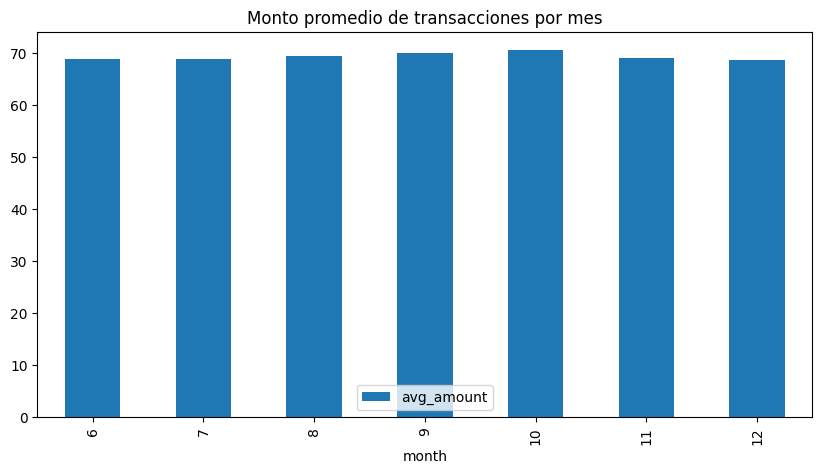

In [31]:
# Grafico 1
df.plot(x='month', y='avg_amount', kind='bar', title='Monto promedio de transacciones por mes', figsize=(10, 5))

### 4.2. ¿Cuál es el monto promedio de transacciones por mes y por género?

### 4.3. ¿Cuál es el monto promedio de transacciones por mes y por género y por ciudad?

### 4.4. ¿Cuál es el porcentaje de transacciones fraudulentas por mes? Mostrar el mes y el porcentaje de transacciones fraudulentas.

### 4.5 ¿Cuál es el género más susceptible a transacciones fraudulentas? Mostrar el género y el porcentaje de transacciones fraudulentas.

### 4.6. ¿Cuál es el porcentaje de transacciones fraudulentas por tienda? Muestre las 10 tiendas con mayor porcentaje de transacciones fraudulentas. Mostrar el nombre de la tienda, la categoría y el porcentaje de transacciones fraudulentas.

### 4.7 ¿Cuál es la categoria de tienda con mayor cantidad de transacciones fraudulentas?. Mostrar el nombre de la categoria y la cantidad de transacciones fraudulentas. Mostrar SOLO la categoria con mayor cantidad de transacciones fraudulentas.

### 4.8 ¿Cuál es el monto promedio de las transacciones fraudulentas por mes? Mostrar el monto promedio y el mes.

### 4.9 ¿Cuál es el cliente que más transacciones fraudulentas realizó? Mostrar el nombre del cliente y la cantidad de transacciones fraudulentas.